In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import astropy.units as u
import astropy.coordinates as coord
from astropy.table import Table
from astropy.io import fits

In [2]:
plt.style.use('notebook')

In [3]:
t = Table.read('../data/rcat.fits')
# ind_bm = t['FLAG_BITMASK'] & (1 << 5)
# ind_bm = ind_bm.astype('bool')

ind = np.isfinite(t['GAIADR2_PMRA']) & (t['FLAG']==0) & (t['SNR']>10) & (t['E_tot_pot1']<0)
# ind = (np.isfinite(t['GAIADR2_PMRA']) & (t['dup']<=1) & (-t['lnL'] < 2.5E3+t['SNR']**2.4) &
#        (t['SNR']>10) & (np.abs(t['V_tan'])<1000) & (t['E_tot_pot1']<0) & (t['Vrot']<10))
# ind = (np.isfinite(t['GAIADR2_PMRA']) & (t['SNR']>10) & (t['E_tot_pot1']<0) &
#       (t['FLAG']==0 | ((t['FLAG']!=0) & (t['Vrot']<10)) | ((t['FLAG']!=0) & (t['Teff']<7500))))


t = t[ind]
print(len(t))

age = 10**t['logAge']*1e-9
age_lerr = age - 10**(t['logAge']-t['logAge_lerr'])*1e-9
age_uerr = 10**(t['logAge']+t['logAge_uerr'])*1e-9 - age
age_err = 0.5 * (age_lerr + age_uerr)

11407


/usr/lib64/python3.6/site-packages/astropy/table/column.py:1020: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)
/usr/lib64/python3.6/site-packages/astropy/table/column.py:1020: RuntimeWarning: invalid value encountered in less
  result = getattr(super(), op)(other)


In [4]:
print(t.colnames)

['starname', 'tileID', 'selID', 'dateID', 'fibID', 'redID', 'pipeID', 'H3_ID', 'TMASS_ID', 'GAIADR2_ID', 'UNWISE_ID', 'RA', 'DEC', 'RA_S', 'DEC_S', 'GAIADR2_RA', 'GAIADR2_RA_ERROR', 'GAIADR2_DEC', 'GAIADR2_DEC_ERROR', 'L', 'B', 'xfocal', 'yfocal', 'CCDTEMP', 'mjd', 'night', 'RAND', 'GUIDE', 'XFIT_RANK', 'MGIANT', 'BHB', 'EBV', 'APOPAYNE_RA', 'APOPAYNE_DEC', 'APOPAYNE_ID', 'APOPAYNE_TEFF', 'APOPAYNE_LOGG', 'APOPAYNE_VMIC', 'APOPAYNE_VMAC', 'APOPAYNE_FEH', 'APOPAYNE_CH', 'APOPAYNE_NH', 'APOPAYNE_OH', 'APOPAYNE_MGH', 'APOPAYNE_ALH', 'APOPAYNE_SIH', 'APOPAYNE_SH', 'APOPAYNE_KH', 'APOPAYNE_CAH', 'APOPAYNE_TIH', 'APOPAYNE_CRH', 'APOPAYNE_MNH', 'APOPAYNE_NIH', 'APOPAYNE_CUH', 'APOPAYNE_C12C13', 'APOPAYNE_CHI2_R', 'APOPAYNE_QUALITY_FLAG', 'APOPAYNE_DMATCH', 'LAMOST_RA', 'LAMOST_DEC', 'LAMOST_ID', 'LAMOST_SPECCLASS', 'LAMOST_SUBCLASS', 'LAMOST_SNRG', 'LAMOST_SNRR', 'LAMOST_TEFF', 'LAMOST_TEFF_ERR', 'LAMOST_LOGG', 'LAMOST_LOGG_ERR', 'LAMOST_FEH', 'LAMOST_FEH_ERR', 'LAMOST_RV', 'LAMOST_RV_ERR', '

In [5]:
vy = t['Vphi_gal']
vxz = np.sqrt(t['Vr_gal']**2 + t['Vtheta_gal']**2)
vlsr = np.sqrt((vy + 220)**2 + vxz**2)

In [6]:
p = [-0.16,0.07]
poly = np.poly1d(p)
ind_trap = (t['init_FeH']>-0.5) & (t['init_FeH']<-0.2) & (t['init_aFe']>0.05) & (t['init_aFe']<poly(t['init_FeH']))
ind_rect = (t['init_FeH']>-0.5) & (t['init_FeH']<-0.2) & (t['init_aFe']>0.05) & (t['init_aFe']<0.1)

In [148]:
ind_safeage = (t['logg']>3.8) & (t['logg']<4.3)

ind_highe = t['eccen_pot1']>0.75
ind_qthick = (t['init_aFe']>0.23) & (t['init_FeH']>-0.8)
ind_splash = ind_highe & ind_qthick

ind_ge = (t['eccen_pot1']>0.8) & (t['Jz_pot1'] - t['JR_pot1']<0) & (t['R_gal']<35) & ~ind_splash
ind_ge = ind_highe & ~ind_qthick
# ind_splash = (t['FeH']>-1) & (vlsr>180) 

In [8]:
np.sum(ind_safeage & ind_ge), np.sum(ind_safeage & ind_splash)

(661, 479)

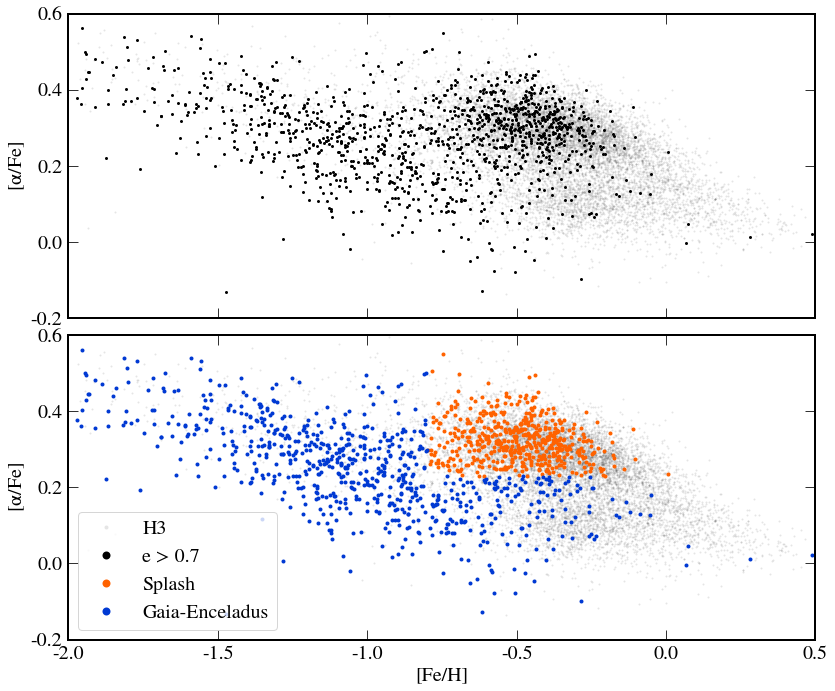

In [9]:
blue = '#0039d3'
purple = '#4700d3'
orange = '#ff6200'
pink = '#ee0449'

fig, ax = plt.subplots(2,1,figsize=(12,10), sharex=True, sharey=True)

plt.sca(ax[0])
plt.plot(t['init_FeH'], t['init_aFe'], 'ko', ms=2, mew=0, alpha=0.1, label='H3')
plt.plot(t['init_FeH'][ind_highe], t['init_aFe'][ind_highe], 'ko', ms=3, mew=0, alpha=1, label='e > 0.7')
# plt.plot(t['init_FeH'][ind_ge], t['init_aFe'][ind_ge], 'o', color=blue, mew=0, ms=3, label='Gaia-Enceladus')
# plt.plot(t['init_FeH'][ind_splash], t['init_aFe'][ind_splash], 'o', color=orange, mew=0, ms=3, label='Splash')
# plt.plot(t['init_FeH'][ind_rect], t['init_aFe'][ind_rect], 'o', color=pink, mew=0, ms=3, label='Pop')

# plt.axhline(0.23)
# plt.axvline(-0.85)
plt.ylabel('[$\\alpha$/Fe]')

plt.sca(ax[1])
plt.plot(t['init_FeH'], t['init_aFe'], 'ko', ms=2, mew=0, alpha=0.1, label='H3')
plt.plot(t['init_FeH'][ind_highe], 5+t['init_aFe'][ind_highe], 'ko', ms=4, mew=0, alpha=1, label='e > 0.7')
plt.plot(t['init_FeH'][ind_splash], t['init_aFe'][ind_splash], 'o', color=orange, mew=0, ms=4, label='Splash')
plt.plot(t['init_FeH'][ind_ge], t['init_aFe'][ind_ge], 'o', color=blue, mew=0, ms=4, label='Gaia-Enceladus')


plt.xlim(-2,0.5)
plt.ylim(-0.2,0.6)
plt.legend(loc=3, markerscale=2)
plt.xlabel('[Fe/H]')
plt.ylabel('[$\\alpha$/Fe]')

plt.tight_layout(h_pad=0)
plt.savefig('../plots/afeh_selection.png')

In [10]:
tall = Table.read('/home/ana/data/rcat_V2.0_MSG.fits')
ind = np.isfinite(tall['GAIADR2_PMRA']) & (tall['FLAG']==0) & (tall['SNR']>10) & (tall['E_tot_pot1']<0)
tall = tall[ind]

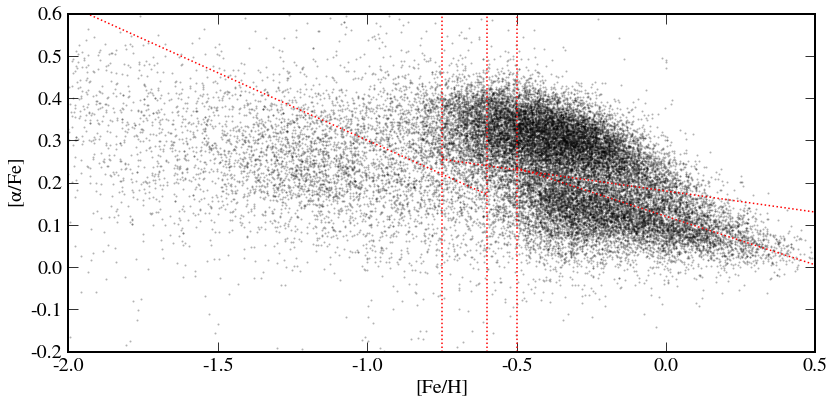

In [149]:
p_ge = [-0.32,-0.02]
poly_ge = np.poly1d(p_ge)
x_ge = np.linspace(-2, -0.6, 30)
y_ge = poly_ge(x_ge)

p_splash = [-0.1,0.18]
poly_splash = np.poly1d(p_splash)
x_splash = np.linspace(-0.75, 0.5, 30)
y_splash = poly_splash(x_splash)

p_lowa = [-0.23,0.12]
poly_lowa = np.poly1d(p_lowa)
x_lowa = np.linspace(-0.5, 0.5, 30)
y_lowa = poly_lowa(x_lowa)


ind_mpoor = (t['init_FeH']<-0.6) & (t['init_aFe']<poly_ge(t['init_FeH']))
ind_ge = ind_mpoor & ind_highe
ind_tdchem = (t['init_FeH']>-0.75) & (t['init_aFe']>poly_splash(t['init_FeH']))
ind_splash = ind_tdchem & ind_highe
ind_thin = (t['init_FeH']>-0.5) & (t['init_aFe']<poly_lowa(t['init_FeH']))

plt.figure(figsize=(12,6))
plt.plot(tall['init_FeH'], tall['init_aFe'], 'ko', ms=2, mew=0, alpha=0.3, label='H3')
# plt.plot(t['init_FeH'][ind_highe], t['init_aFe'][ind_highe], 'ko', ms=4, mew=0, alpha=1, label='e > 0.7')
# plt.plot(t['init_FeH'][ind_splash], t['init_aFe'][ind_splash], 'o', color=orange, mew=0, ms=4, label='Splash')
# plt.plot(t['init_FeH'][ind_ge], t['init_aFe'][ind_ge], 'o', color=blue, mew=0, ms=4, label='Gaia-Enceladus')

plt.plot(x_ge, y_ge, 'r:')
plt.plot(x_splash, y_splash, 'r:')
plt.plot(x_lowa, y_lowa, 'r:')
plt.axvline(-0.75, color='r', ls=':')
plt.axvline(-0.6, color='r', ls=':')
plt.axvline(-0.5, color='r', ls=':')

plt.xlim(-2,0.5)
plt.ylim(-0.2,0.6)
# plt.legend(loc=3, markerscale=2)
plt.xlabel('[Fe/H]')
plt.ylabel('[$\\alpha$/Fe]')
plt.tight_layout()

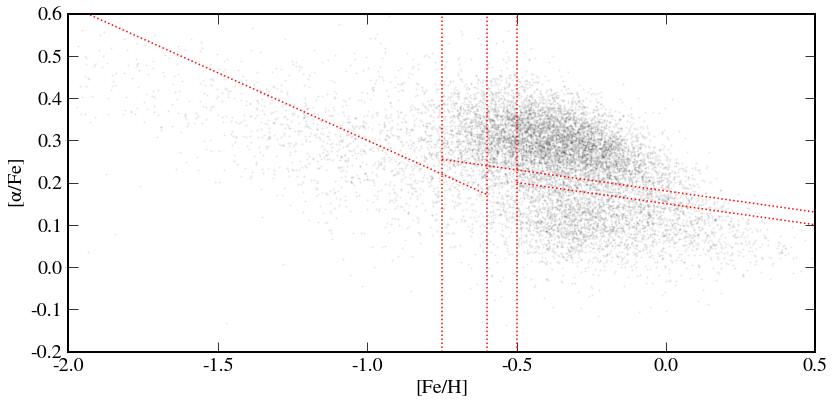

In [150]:
p_ge = [-0.32,-0.02]
poly_ge = np.poly1d(p_ge)
x_ge = np.linspace(-2, -0.6, 30)
y_ge = poly_ge(x_ge)

p_splash = [-0.1,0.18]
poly_splash = np.poly1d(p_splash)
x_splash = np.linspace(-0.75, 0.5, 30)
y_splash = poly_splash(x_splash)

p_lowa = [-0.1,0.15]
# p_lowa = [-0.23,0.12]
poly_lowa = np.poly1d(p_lowa)
x_lowa = np.linspace(-0.5, 0.5, 30)
y_lowa = poly_lowa(x_lowa)


ind_mpoor = (t['init_FeH']<-0.6) & (t['init_aFe']<poly_ge(t['init_FeH']))
ind_ge = ind_mpoor & ind_highe
ind_tdchem = (t['init_FeH']>-0.75) & (t['init_aFe']>poly_splash(t['init_FeH']))
ind_splash = ind_tdchem & ind_highe
ind_thin = (t['init_FeH']>-0.5) & (t['init_aFe']<poly_lowa(t['init_FeH']))

plt.figure(figsize=(12,6))
plt.plot(t['init_FeH'], t['init_aFe'], 'ko', ms=2, mew=0, alpha=0.1, label='H3')
# plt.plot(t['init_FeH'][ind_highe], t['init_aFe'][ind_highe], 'ko', ms=4, mew=0, alpha=1, label='e > 0.7')
# plt.plot(t['init_FeH'][ind_splash], t['init_aFe'][ind_splash], 'o', color=orange, mew=0, ms=4, label='Splash')
# plt.plot(t['init_FeH'][ind_ge], t['init_aFe'][ind_ge], 'o', color=blue, mew=0, ms=4, label='Gaia-Enceladus')

plt.plot(x_ge, y_ge, 'r:')
plt.plot(x_splash, y_splash, 'r:')
plt.plot(x_lowa, y_lowa, 'r:')
plt.axvline(-0.75, color='r', ls=':')
plt.axvline(-0.6, color='r', ls=':')
plt.axvline(-0.5, color='r', ls=':')

plt.xlim(-2,0.5)
plt.ylim(-0.2,0.6)
# plt.legend(loc=3, markerscale=2)
plt.xlabel('[Fe/H]')
plt.ylabel('[$\\alpha$/Fe]')
plt.tight_layout()

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:68: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


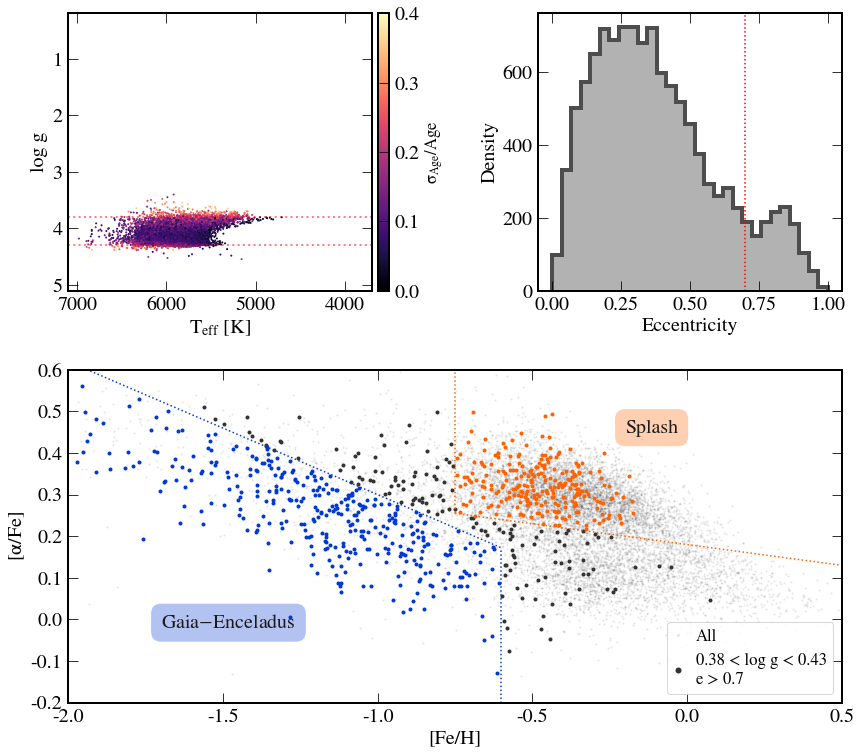

In [42]:
fig = plt.figure(figsize=(12,11))
gs1 = mpl.gridspec.GridSpec(1,2)
gs1.update(left=0.08, right=0.975, top=0.95, bottom=0.6, wspace=0.55)

gs2 = mpl.gridspec.GridSpec(1,1)
gs2.update(left=0.08, right=0.975, top=0.5, bottom=0.08)

ax0 = fig.add_subplot(gs1[0])
ax1 = fig.add_subplot(gs1[1])
ax2 = fig.add_subplot(gs2[0])
# ax3 = fig.add_subplot(gs2[1], sharex=ax2, sharey=ax2)
# plt.setp(ax2.get_xticklabels(), visible=False)
# axt = [ax0, ax1]
# axb = [ax2, ax3]

plt.sca(ax0)
# plt.plot(t['Teff'], t['logg'], 'ko', mew=0, ms=2, alpha=0.1)
im = plt.scatter(t['Teff'], t['logg'], c=age_err/age, vmin=0, vmax=0.4, s=1, cmap='magma')
# plt.plot(t['Teff'][ind_safeage], t['logg'][ind_safeage], 'ko', mew=0, ms=2, alpha=1)
plt.axhline(3.8, ls=':', color='r', alpha=0.5, lw=2)
plt.axhline(4.3, ls=':', color='r', alpha=0.5, lw=2)

plt.xlim(7100,3700)
plt.ylim(5.1,0.2)
plt.xlabel('$T_{eff}$ [K]')
plt.ylabel('log g')

pos = plt.gca().get_position()
cax = plt.axes([pos.x1+0.007,pos.y0,0.013,pos.y1 - pos.y0])
plt.colorbar(im, cax=cax) #, ticks=[-5,-2.5,0,2.5,5])
# plt.yticks(fontsize=font_tick)
plt.ylabel('$\sigma_{Age} / Age$', fontsize='small')

plt.sca(ax1)
ebins = np.linspace(0,1,30)
plt.hist(t['eccen_pot1'], bins=ebins, color='k', alpha=0.3)
plt.hist(t['eccen_pot1'], bins=ebins, color='0.3', histtype='step', lw=4)
plt.axvline(0.7, ls=':', color='r')

plt.xlabel('Eccentricity')
plt.ylabel('Density')

plt.sca(ax2)
plt.plot(t['init_FeH'], t['init_aFe'], 'ko', ms=2, mew=0, alpha=0.1, label='All')
plt.plot(t['init_FeH'][ind_highe & ~ind_splash & ~ind_ge], t['init_aFe'][ind_highe & ~ind_splash & ~ind_ge],
         'o', color='0.2', ms=4, mew=0, alpha=1, label='0.38 < log g < 0.43\ne > 0.7')
plt.plot(t['init_FeH'][ind_splash], t['init_aFe'][ind_splash], 'o', color=orange, mew=0, ms=4, label='')
plt.plot(t['init_FeH'][ind_ge], t['init_aFe'][ind_ge], 'o', color=blue, mew=0, ms=4, label='')

plt.plot(x_ge, y_ge, ':', color=blue, label='')
plt.plot([-0.6, -0.6], [-0.2, poly_ge(-0.6)], ':', color=blue, label='')
plt.plot(x_splash, y_splash, ':', color=orange, label='')
plt.plot([-0.75, -0.75], [poly_splash(-0.75), 0.6], ':', color=orange, label='')

plt.legend(loc=4, markerscale=1.5, handlelength=0.5, fontsize='small')
plt.text(-0.2, 0.45, 'Splash', color='0.1',
         bbox=dict(facecolor=orange, ec='none', alpha=0.3, boxstyle='round', pad=0.5))
plt.text(-1.7, -0.02, 'Gaia$-$Enceladus', color='0.1',
         bbox=dict(facecolor=blue, ec='none', alpha=0.3, boxstyle='round', pad=0.5))

plt.xlim(-2,0.5)
plt.ylim(-0.2,0.6)
# plt.legend(loc=3, markerscale=2)
plt.xlabel('[Fe/H]')
plt.ylabel('[$\\alpha$/Fe]')


plt.tight_layout()
plt.savefig('../plots/selection.png')

329


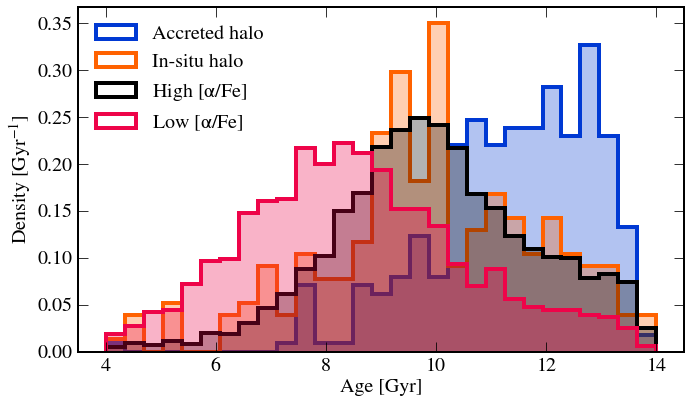

In [120]:
abins = np.linspace(4,14,30)
ind_thick = ind_tdchem & (t['eccen_pot1']>0.) & (t['eccen_pot1']<0.4)
# ind_thin = (t['init_FeH']>-0.5) & (t['init_aFe']<poly_splash(t['init_FeH']))
ind_thin_e = ind_thin & (t['eccen_pot1']>0.4)
ind_thin_c = ind_thin & (t['eccen_pot1']<0.2)
ind_thin_geom = (np.abs(t['Z_gal'])<1.) & (t['eccen_pot1']<0.25)
ind_highsnr = (t['SNR']>10)

plt.figure(figsize=(10,6))

# plt.hist(age[ind_safeage & ind_thin], color='0.2', bins=abins, alpha=0.5, density=True,
#          label='Thin disk', histtype='step', ls=':', lw=3, zorder=10)
# plt.hist(age[ind_safeage & ind_thin_c], color='0.4', bins=abins, alpha=0.5, density=True,
#          label='Low $\\alpha$, e<0.2', histtype='step', ls=':', lw=3, zorder=10)
# plt.hist(age[ind_safeage & ind_thin_e], color='0.2', bins=abins, alpha=0.5, density=True,
#          label='Low $\\alpha$, e>0.4', histtype='step', ls=':', lw=3, zorder=10)
# plt.hist(age[ind_safeage & ind_thick], color='0.2', bins=abins, alpha=0.5, density=True,
#          label='High $\\alpha$, e<0.4', histtype='step', ls='--', lw=3, zorder=10)

plt.hist(age[ind_safeage & ind_ge & ind_highsnr], color=blue, bins=abins, alpha=0.3, density=True, label='')
plt.hist(age[ind_safeage & ind_ge & ind_highsnr], color=blue, bins=abins, density=True, histtype='step', lw=4,
         label='Accreted halo')
plt.hist(age[ind_safeage & ind_splash & ind_highsnr], color=orange, bins=abins, alpha=0.3, density=True, label='')
plt.hist(age[ind_safeage & ind_splash & ind_highsnr], color=orange, bins=abins, density=True, histtype='step', lw=4,
         label='In-situ halo')
plt.hist(age[ind_safeage & ind_tdchem & ind_highsnr], color='k', bins=abins, alpha=0.3, density=True, label='')
plt.hist(age[ind_safeage & ind_tdchem & ind_highsnr], color='k', bins=abins, density=True,
         histtype='step', lw=4, label='High [$\\alpha$/Fe]')
plt.hist(age[ind_safeage & ind_thin & ind_highsnr], color=pink, bins=abins, alpha=0.3, density=True, label='')
plt.hist(age[ind_safeage & ind_thin & ind_highsnr], color=pink, bins=abins, density=True, histtype='step', lw=4,
         label='Low [$\\alpha$/Fe]')

print(np.sum(ind_safeage & ind_ge & ind_highsnr))
plt.legend(loc=2, frameon=False)
plt.xlabel('Age [Gyr]')
plt.ylabel('Density [Gyr$^{-1}$]')

plt.tight_layout()
# plt.savefig('../plots/ge_splash_ages.png')

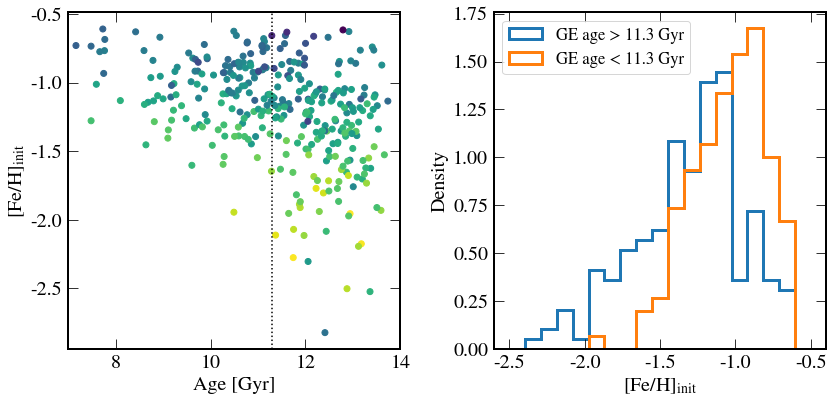

In [109]:
# plt.plot(age[ind_safeage & ind_ge & ind_highsnr], t['init_FeH'][ind_safeage & ind_ge & ind_highsnr], 'k.')

fig, ax = plt.subplots(1,2,figsize=(12,6))

plt.sca(ax[0])
plt.scatter(age[ind_safeage & ind_ge & ind_highsnr], t['init_FeH'][ind_safeage & ind_ge & ind_highsnr],
           c=t['init_aFe'][ind_safeage & ind_ge & ind_highsnr])

plt.xlabel('Age [Gyr]')
plt.ylabel('[Fe/H]$_{init}$')
plt.xlim(7,14)

age_split = 11.3
plt.axvline(age_split, c='k', ls=':')
ind_age1 = age>=age_split
ind_age2 = age<age_split
fehbins = np.linspace(-2.5,-0.5,20)

plt.sca(ax[1])
plt.hist(t['init_FeH'][ind_safeage & ind_ge & ind_highsnr & ind_age1], label='GE age > {:.1f} Gyr'.format(age_split),
         bins=fehbins, histtype='step', lw=3, density=True)
plt.hist(t['init_FeH'][ind_safeage & ind_ge & ind_highsnr & ind_age2], label='GE age < {:.1f} Gyr'.format(age_split),
         bins=fehbins, histtype='step', lw=3, density=True)

plt.legend(loc=2, fontsize='small')
plt.xlabel('[Fe/H]$_{init}$')
plt.ylabel('Density')

plt.tight_layout()
plt.savefig('../plots/ge_evolution.png')

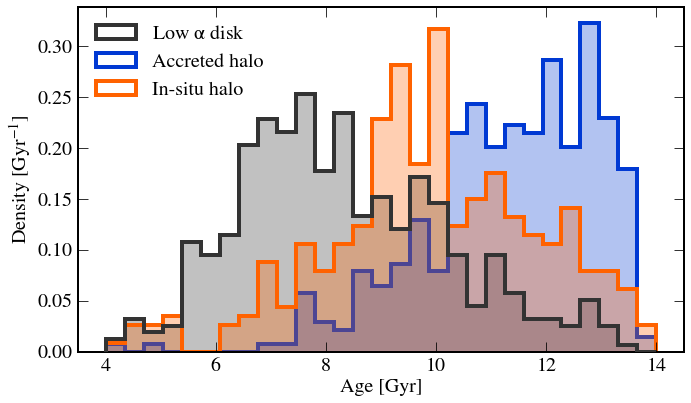

In [151]:
abins = np.linspace(4,14,30)
ind_thick = ind_tdchem & (t['eccen_pot1']>0.) & (t['eccen_pot1']<0.4)
# ind_thin = (t['init_FeH']>-0.5) & (t['init_aFe']<poly_splash(t['init_FeH']))
ind_thin_e = ind_thin & (t['eccen_pot1']>0.4)
ind_thin_c = ind_thin & (t['eccen_pot1']<0.2)

plt.figure(figsize=(10,6))

# plt.hist(age[ind_safeage & ind_thin], color='0.2', bins=abins, alpha=0.5, density=True,
#          label='Thin disk', histtype='step', ls=':', lw=3, zorder=10)
# plt.hist(age[ind_safeage & ind_thin_c], color='0.4', bins=abins, alpha=0.5, density=True,
#          label='Low $\\alpha$, e<0.2', histtype='step', ls=':', lw=3, zorder=10)
# plt.hist(age[ind_safeage & ind_thin_e], color='0.2', bins=abins, alpha=0.5, density=True,
#          label='Low $\\alpha$, e>0.4', histtype='step', ls=':', lw=3, zorder=10)
plt.hist(age[ind_safeage & ind_trap & (t['eccen_pot1']<0.25)], color='0.2', bins=abins, alpha=0.3,
         density=True, label='')
plt.hist(age[ind_safeage & ind_trap & (t['eccen_pot1']<0.25)], color='0.2', bins=abins, alpha=1, density=True,
         label='Low $\\alpha$ disk', histtype='step', ls='-', lw=4, zorder=10)
# plt.hist(age[ind_safeage & ind_thick], color='0.2', bins=abins, alpha=0.5, density=True,
#          label='High $\\alpha$ disk', histtype='step', ls='--', lw=3, zorder=10)

plt.hist(age[ind_safeage & ind_ge], color=blue, bins=abins, alpha=0.3, density=True, label='')
plt.hist(age[ind_safeage & ind_ge], color=blue, bins=abins, density=True, histtype='step', lw=4,
         label='Accreted halo')
plt.hist(age[ind_safeage & ind_splash], color=orange, bins=abins, alpha=0.3, density=True, label='')
plt.hist(age[ind_safeage & ind_splash], color=orange, bins=abins, density=True, histtype='step', lw=4,
         label='In-situ halo')

plt.legend(loc=2, frameon=False)
plt.xlabel('Age [Gyr]')
plt.ylabel('Density [Gyr$^{-1}$]')

plt.tight_layout()
# plt.savefig('../plots/ge_splash_ages.png')
plt.savefig('../plots/age_mw_components.png')

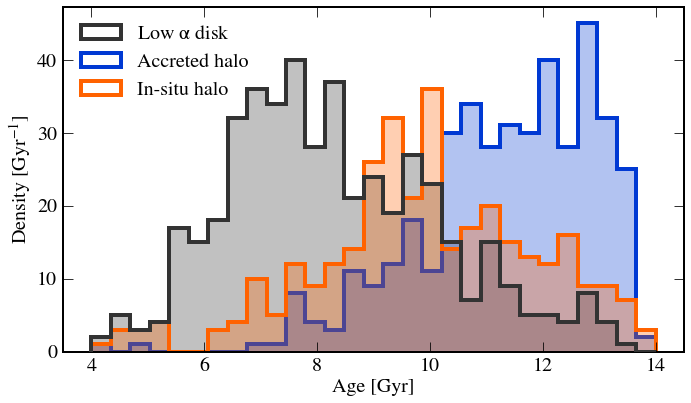

In [152]:
abins = np.linspace(4,14,30)
plt.figure(figsize=(10,6))

plt.hist(age[ind_safeage & ind_trap & (t['eccen_pot1']<0.25)], color='0.2', bins=abins, alpha=0.3,
         density=False, label='')
plt.hist(age[ind_safeage & ind_trap & (t['eccen_pot1']<0.25)], color='0.2', bins=abins, alpha=1, density=False,
         label='Low $\\alpha$ disk', histtype='step', ls='-', lw=4, zorder=10)

plt.hist(age[ind_safeage & ind_ge], color=blue, bins=abins, alpha=0.3, density=False, label='')
plt.hist(age[ind_safeage & ind_ge], color=blue, bins=abins, density=False, histtype='step', lw=4,
         label='Accreted halo')

plt.hist(age[ind_safeage & ind_splash], color=orange, bins=abins, alpha=0.3, density=False, label='')
plt.hist(age[ind_safeage & ind_splash], color=orange, bins=abins, density=False, histtype='step', lw=4,
         label='In-situ halo')

plt.legend(loc=2, frameon=False)
plt.xlabel('Age [Gyr]')
plt.ylabel('Density [Gyr$^{-1}$]')

plt.tight_layout()
plt.savefig('../plots/age_mw_components_tot.png')

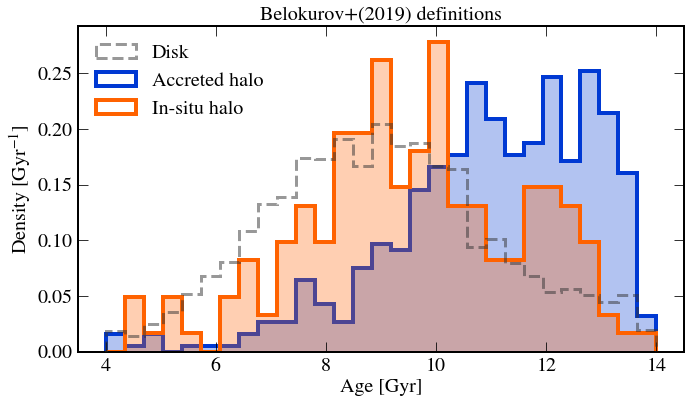

In [132]:
abins = np.linspace(4,14,30)

ind_bdisk = (t['Vphi_gal']<-200) & (t['FeH']>-0.7)
ind_bge = (t['Vphi_gal']>0) & (t['FeH']<-0.7)
ind_bsplash = (t['Vphi_gal']>0) & (t['FeH']>-0.7)

plt.figure(figsize=(10,6))

plt.hist(age[ind_safeage & ind_bdisk], color='0.2', bins=abins, alpha=0.5, density=True,
         label='Disk', histtype='step', ls='--', lw=3, zorder=10)
plt.hist(age[ind_safeage & ind_bge], color=blue, bins=abins, alpha=0.3, density=True, label='')
plt.hist(age[ind_safeage & ind_bge], color=blue, bins=abins, density=True, histtype='step', lw=4,
         label='Accreted halo')
plt.hist(age[ind_safeage & ind_bsplash], color=orange, bins=abins, alpha=0.3, density=True, label='')
plt.hist(age[ind_safeage & ind_bsplash], color=orange, bins=abins, density=True, histtype='step', lw=4,
         label='In-situ halo')

plt.legend(loc=2, frameon=False)
plt.xlabel('Age [Gyr]')
plt.ylabel('Density [Gyr$^{-1}$]')
plt.title('Belokurov+(2019) definitions', fontsize='medium')

plt.tight_layout()
# plt.savefig('../plots/ge_splash_ages.png')

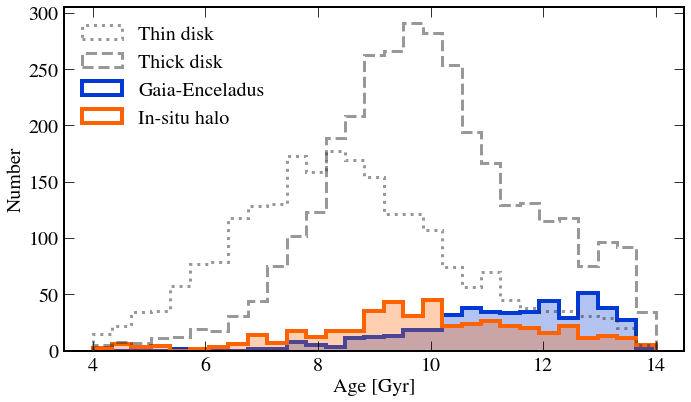

In [23]:
abins = np.linspace(4,14,30)
ind_thick = ind_tdchem & (t['eccen_pot1']>0.) & (t['eccen_pot1']<0.4)
# ind_thin = (t['init_FeH']>-0.5) & (t['init_aFe']<poly_splash(t['init_FeH']))

plt.figure(figsize=(10,6))

plt.hist(age[ind_safeage & ind_thin], color='0.2', bins=abins, alpha=0.5, density=False,
         label='Thin disk', histtype='step', ls=':', lw=3, zorder=10)
plt.hist(age[ind_safeage & ind_thick], color='0.2', bins=abins, alpha=0.5, density=False,
         label='Thick disk', histtype='step', ls='--', lw=3, zorder=10)

plt.hist(age[ind_safeage & ind_ge], color=blue, bins=abins, alpha=0.3, density=False, label='')
plt.hist(age[ind_safeage & ind_ge], color=blue, bins=abins, density=False, histtype='step', lw=4,
         label='Gaia-Enceladus')
plt.hist(age[ind_safeage & ind_splash], color=orange, bins=abins, alpha=0.3, density=False, label='')
plt.hist(age[ind_safeage & ind_splash], color=orange, bins=abins, density=False, histtype='step', lw=4,
         label='In-situ halo')

plt.legend(loc=2, frameon=False)
plt.xlabel('Age [Gyr]')
plt.ylabel('Number')

plt.tight_layout()
plt.savefig('../plots/ge_splash_ages_totnum.png')

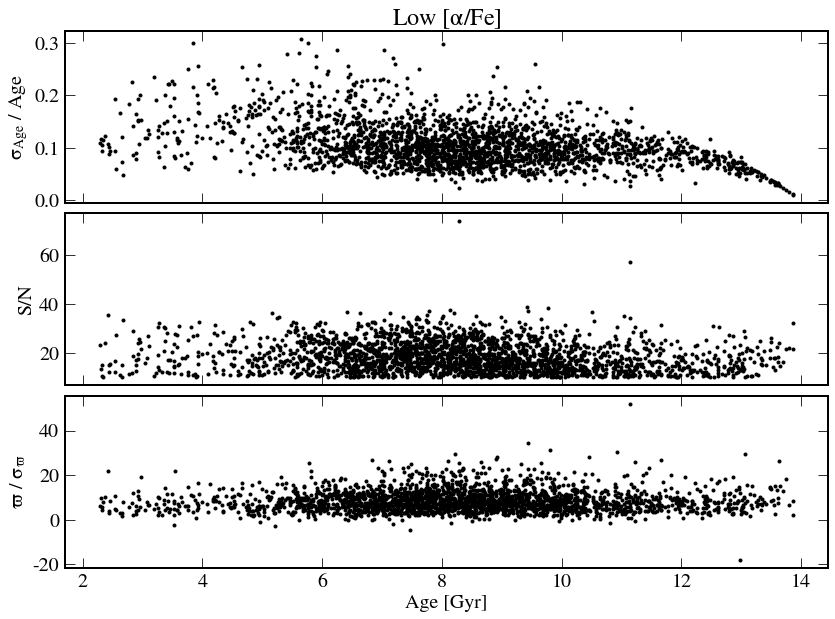

In [24]:
fig, ax = plt.subplots(3,1,figsize=(12,9), sharex=True)

plt.sca(ax[0])
plt.plot(age[ind_safeage & ind_thin], age_err[ind_safeage & ind_thin]/age[ind_safeage & ind_thin], 'k.')
plt.ylabel('$\sigma_{Age}$ / Age')
plt.title('Low [$\\alpha$/Fe]')

plt.sca(ax[1])
plt.plot(age[ind_safeage & ind_thin], t['SNR'][ind_safeage & ind_thin], 'k.')
plt.ylabel('S/N')

plt.sca(ax[2])
plt.plot(age[ind_safeage & ind_thin], t['GAIADR2_PARALLAX_OVER_ERROR'][ind_safeage & ind_thin], 'k.')
plt.ylabel('$\\varpi$ / $\sigma_\\varpi$')
plt.xlabel('Age [Gyr]')

plt.tight_layout(h_pad=0)
plt.savefig('../plots/uncertainties_lowalpha.png')

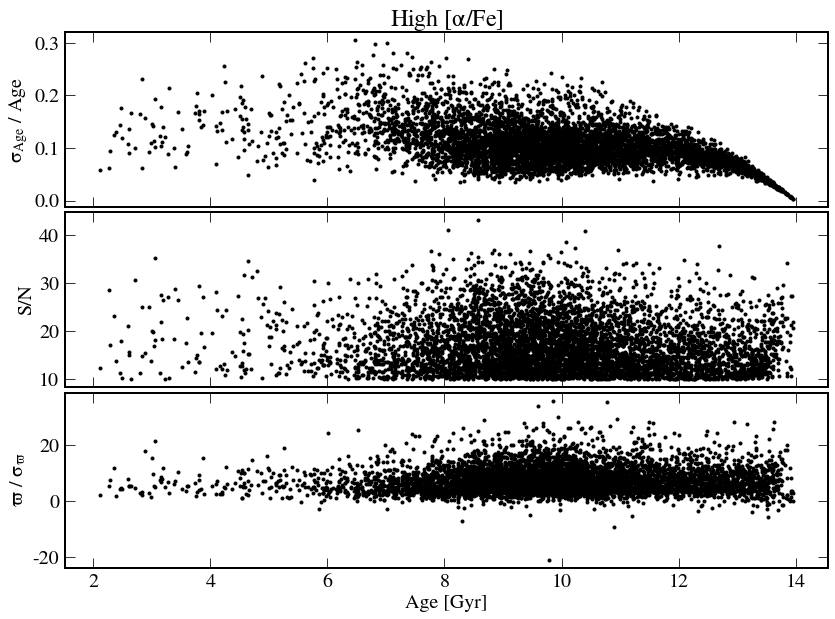

In [25]:
fig, ax = plt.subplots(3,1,figsize=(12,9), sharex=True)

plt.sca(ax[0])
plt.plot(age[ind_safeage & ind_tdchem], age_err[ind_safeage & ind_tdchem]/age[ind_safeage & ind_tdchem], 'k.')
plt.ylabel('$\sigma_{Age}$ / Age')
plt.title('High [$\\alpha$/Fe]')

plt.sca(ax[1])
plt.plot(age[ind_safeage & ind_tdchem], t['SNR'][ind_safeage & ind_tdchem], 'k.')
plt.ylabel('S/N')

plt.sca(ax[2])
plt.plot(age[ind_safeage & ind_tdchem], t['GAIADR2_PARALLAX_OVER_ERROR'][ind_safeage & ind_tdchem], 'k.')
plt.ylabel('$\\varpi$ / $\sigma_\\varpi$')
plt.xlabel('Age [Gyr]')

plt.tight_layout(h_pad=0)
plt.savefig('../plots/uncertainties_highalpha.png')

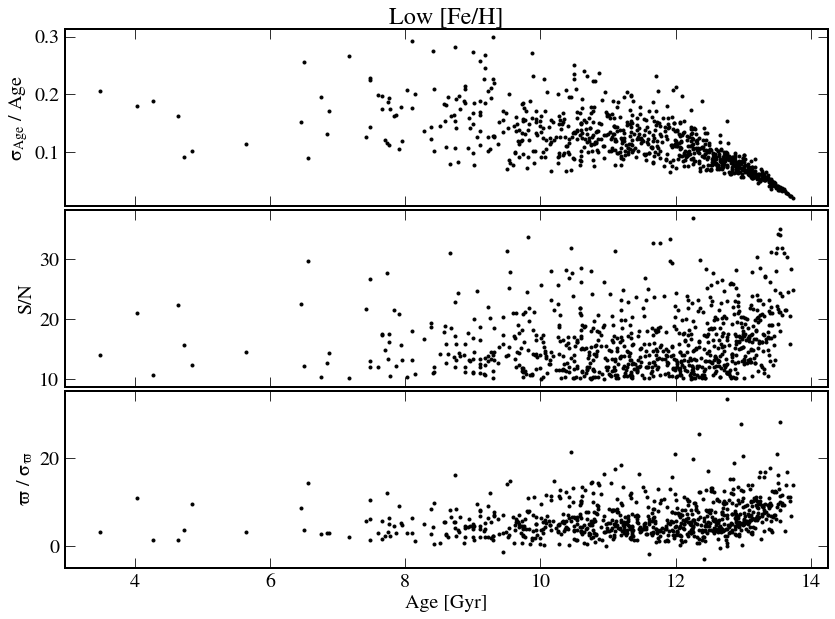

In [26]:
fig, ax = plt.subplots(3,1,figsize=(12,9), sharex=True)

plt.sca(ax[0])
plt.plot(age[ind_safeage & ind_mpoor], age_err[ind_safeage & ind_mpoor]/age[ind_safeage & ind_mpoor], 'k.')
plt.ylabel('$\sigma_{Age}$ / Age')
plt.title('Low [Fe/H]')

plt.sca(ax[1])
plt.plot(age[ind_safeage & ind_mpoor], t['SNR'][ind_safeage & ind_mpoor], 'k.')
plt.ylabel('S/N')

plt.sca(ax[2])
plt.plot(age[ind_safeage & ind_mpoor], t['GAIADR2_PARALLAX_OVER_ERROR'][ind_safeage & ind_mpoor], 'k.')
plt.ylabel('$\\varpi$ / $\sigma_\\varpi$')
plt.xlabel('Age [Gyr]')

plt.tight_layout(h_pad=0)
plt.savefig('../plots/uncertainties_mpoor.png')

## Spatial distribution

In [29]:
rcyl = np.sqrt(t['X_gal']**2 + t['Y_gal']**2)

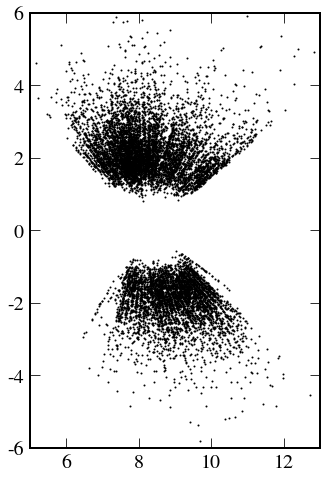

In [30]:
plt.plot(rcyl, t['Z_gal'], 'ko', mew=0, ms=2)

plt.ylim(-6,6)
plt.xlim(5,13)
plt.gca().set_aspect('equal')

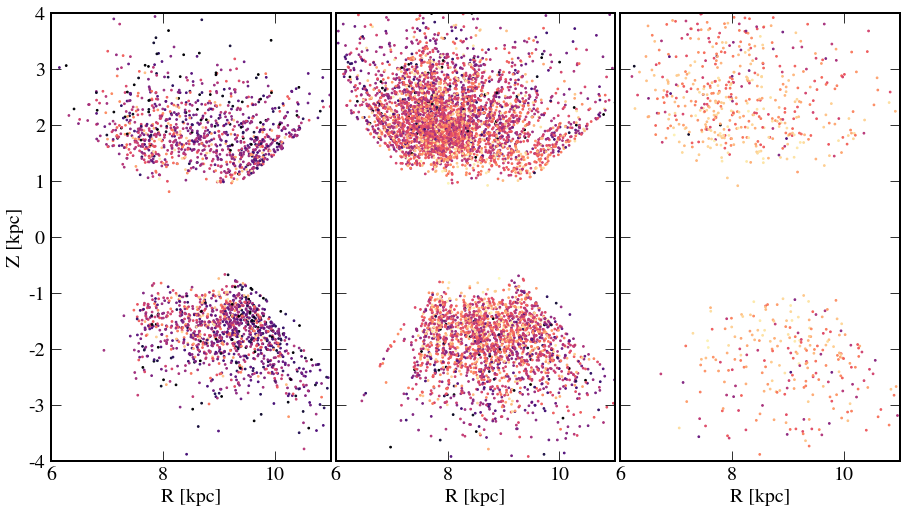

In [31]:
fig, ax = plt.subplots(1,3, figsize=(13,13), sharey=True)

for e, ind in enumerate([ind_thin, ind_tdchem, ind_mpoor]):
    plt.sca(ax[e])
    plt.scatter(rcyl[ind_safeage & ind], t['Z_gal'][ind_safeage & ind],
                c=age[ind_safeage & ind], cmap='magma', vmin=4, vmax=14, s=3)

    plt.ylim(-4,4)
    plt.xlim(6,11)
    plt.gca().set_aspect('equal')
    plt.xlabel('R [kpc]')

    
plt.sca(ax[0])
plt.ylabel('Z [kpc]')
plt.tight_layout(w_pad=0)

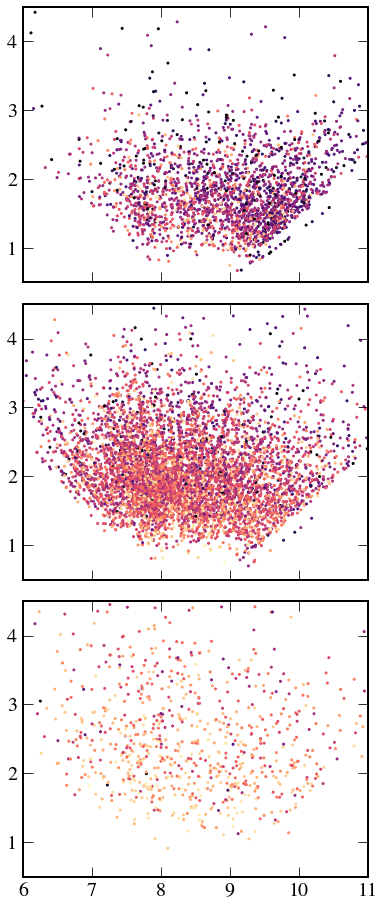

In [32]:
fig, ax = plt.subplots(3, 1, figsize=(13,13), sharex=True)

for e, ind in enumerate([ind_thin, ind_tdchem, ind_mpoor]):
    plt.sca(ax[e])
    plt.scatter(rcyl[ind_safeage & ind], np.abs(t['Z_gal'][ind_safeage & ind]),
                c=age[ind_safeage & ind], cmap='magma', vmin=4, vmax=14, s=4)

    plt.ylim(0.5,4.5)
    plt.xlim(6,11)
    plt.gca().set_aspect('equal')
#     plt.xlabel('R [kpc]')

    
plt.sca(ax[0])
# plt.ylabel('|Z| [kpc]')
plt.tight_layout(w_pad=0)

In [33]:
ids = np.unique(t['selID'][ind_thin & ind_safeage])
for i in ids:
    nold = np.sum((t['selID'][ind_thin & ind_safeage]==i) & (age[ind_thin & ind_safeage]>10))
    ntot = np.sum(t['selID'][ind_thin & ind_safeage]==i)
    print(i, nold, ntot, nold/ntot)

ca1 35 98 0.35714285714285715
cb1 0 1 0.0
cc1 28 140 0.2
ga1 123 617 0.1993517017828201
gb1 74 352 0.21022727272727273
gc1 238 1188 0.20033670033670034


In [34]:
ids = np.unique(t['selID'][ind_tdchem & ind_safeage])
for i in ids:
    print(i, np.sum(t['selID'][ind_tdchem & ind_safeage]==i))

ca1 254
cc1 604
ga1 1922
gb1 1140
gc1 2235


- td drop-off - check if consistent w 9 + gaussian uncertainty of 0.04dex
- timing the merger - radial merger: size of the mw then: 30kpc from apocenter, can estimate how long it takes from to merge, mass of the mw = 10% of today (just the thick disk), abundance match to check virial radius 30kpc?
- if we time it - do we get time to shut off the thick disk? or is the dropoff just the uncertainty
- reionization: peak star-formation of the halo - turnover at 12 Gyr (at all eccentricities, not just GE, so plausible they were shut by a global event) - future, even patchiness?

- for the talk: end up with the timeline - connect to extragalactic groups: z\~0 exoplanets etc forming in the thin disk, z\~2 galaxies (simcoe), z\~6 reionization (hera, stuff? that leads to it)

- to do:
- 3 figures: selection, slices in age, slices in eccentricity 
- 4th: summary
- 5th: cartoon

## eccentricity dependence

/usr/lib64/python3.6/site-packages/astropy/table/column.py:1020: RuntimeWarning: invalid value encountered in greater_equal
  result = getattr(super(), op)(other)


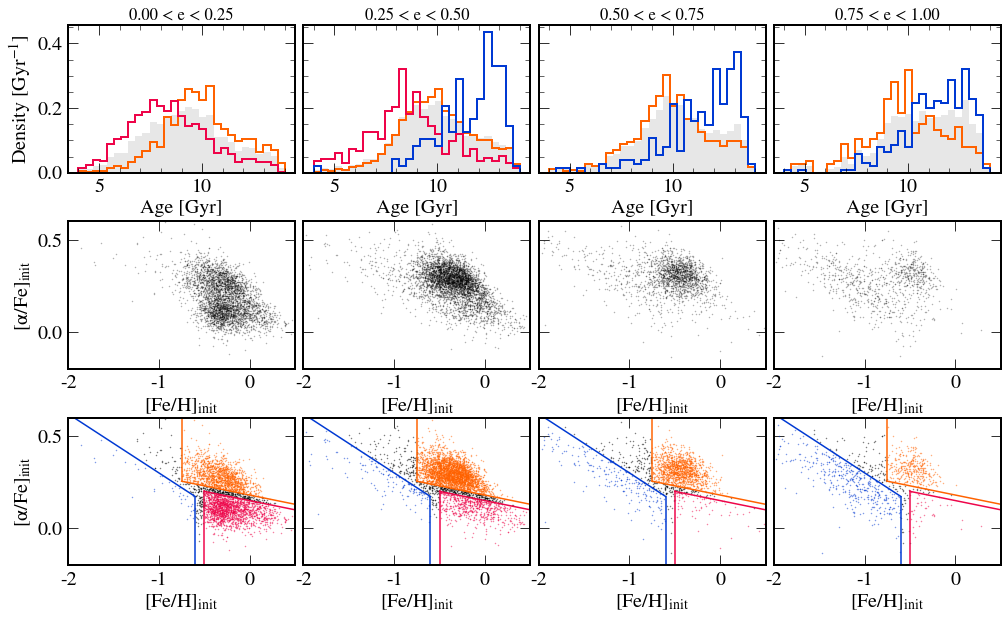

In [35]:
ecc_ranges = np.array([0,0.25,0.5,0.75,1])
# ecc_ranges = np.array([0,0.2,0.4,1])
Ne = np.size(ecc_ranges) - 1
wabins = np.linspace(4,14,20)

da = 3
fig, ax = plt.subplots(3,Ne,figsize=(1.2*Ne*da,3*da), sharey='row')

for i in range(Ne):
    ind = (t['eccen_pot1']>=ecc_ranges[i]) & (t['eccen_pot1']<ecc_ranges[i+1])
    
    plt.sca(ax[0][i])
    plt.hist(age[ind_safeage & ind], bins=abins, color='0.1', histtype='stepfilled', alpha=0.1, lw=2, density=True)
    plt.hist(age[ind_safeage & ind & ind_tdchem], bins=abins, color=orange, histtype='step', lw=2, density=True)
    if np.sum(ind_safeage & ind & ind_thin)>100:
        plt.hist(age[ind_safeage & ind & ind_thin], bins=abins, color=pink, histtype='step', lw=2, density=True)
#     else:
#         plt.hist(age[ind_safeage & ind & ind_thin], bins=wabins, color=pink, histtype='step', lw=2, density=True)
    if np.sum(ind_safeage & ind & ind_mpoor)>50:
        plt.hist(age[ind_safeage & ind & ind_mpoor], bins=abins, color=blue, histtype='step', lw=2, density=True)
    
    plt.title('{:.2f} < e < {:.2f}'.format(ecc_ranges[i], ecc_ranges[i+1]), fontsize='small')
    plt.xlabel('Age [Gyr]')
    plt.minorticks_on()
    
    plt.sca(ax[1][i])
#     plt.plot(t['init_FeH'][ind], t['init_aFe'][ind], 'ko', mew=0, ms=1.5, alpha=0.3)
    plt.plot(t['init_FeH'][ind_safeage & ind], t['init_aFe'][ind_safeage & ind], 'ko', mew=0, ms=1.5, alpha=0.3)
    
    plt.xlim(-2,0.5)
    plt.ylim(-0.2,0.6)
    plt.xlabel('[Fe/H]$_{init}$')
    
    plt.sca(ax[2][i])
    plt.plot(t['init_FeH'][ind_safeage & ind & ~ind_mpoor & ~ind_thin & ~ind_tdchem],
             t['init_aFe'][ind_safeage & ind & ~ind_mpoor & ~ind_thin & ~ind_tdchem],
             'ko', mew=0, ms=1.5, alpha=0.5)
    plt.plot(t['init_FeH'][ind_safeage & ind_mpoor & ind], t['init_aFe'][ind_safeage & ind_mpoor & ind], 'o',
             color=blue, mew=0, ms=1.5, alpha=0.5)
    plt.plot(t['init_FeH'][ind_safeage & ind_tdchem & ind], t['init_aFe'][ind_safeage & ind_tdchem & ind], 'o',
             color=orange, mew=0, ms=1.5, alpha=0.5)
    plt.plot(t['init_FeH'][ind_safeage & ind_thin & ind], t['init_aFe'][ind_safeage & ind_thin & ind], 'o',
             color=pink, mew=0, ms=1.5, alpha=0.5)
    plt.plot(x_ge, y_ge, '-', color=blue, label='')
    plt.plot([-0.6, -0.6], [-0.2, poly_ge(-0.6)], '-', color=blue, label='')
    plt.plot(x_splash, y_splash, '-', color=orange, label='')
    plt.plot([-0.75, -0.75], [poly_splash(-0.75), 0.6], '-', color=orange, label='')
    plt.plot(x_lowa, y_lowa, '-', color=pink, label='')
    plt.plot([-0.5, -0.5], [-0.2, poly_lowa(-0.5)], '-', color=pink, label='')
    
    plt.xlim(-2,0.5)
    plt.ylim(-0.2,0.6)
    plt.xlabel('[Fe/H]$_{init}$')
    
plt.sca(ax[0][0])
plt.ylabel('Density [Gyr$^{-1}$]')

plt.sca(ax[1][0])
plt.ylabel('[$\\alpha$/Fe]$_{init}$')

plt.sca(ax[2][0])
plt.ylabel('[$\\alpha$/Fe]$_{init}$')
# plt.text(0.52,0.85,'3.8 < log g < 4.3', fontsize='x-small', transform=plt.gca().transAxes)
    
plt.tight_layout(h_pad=0.1, w_pad=0)
plt.savefig('../plots/age_byeccentricity.png')

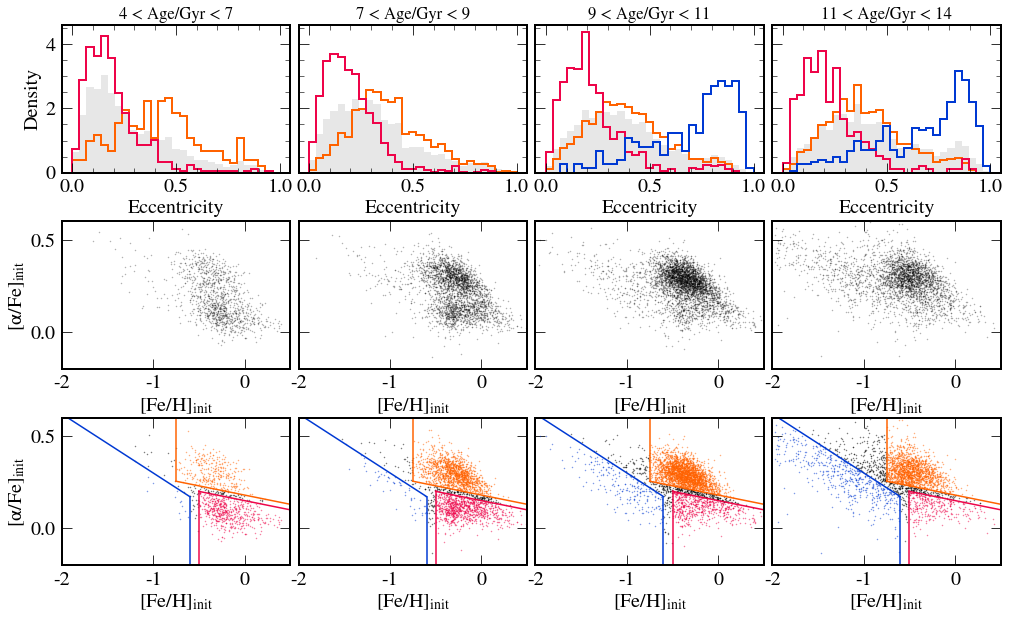

In [37]:
age_ranges = np.array([4,7,9,11,14])
Na = np.size(age_ranges) - 1
ebins = np.linspace(0,1,30)

da = 3
fig, ax = plt.subplots(3,Na,figsize=(1.2*Na*da,3*da), sharey='row')

for i in range(Na):
    ind = (age>=age_ranges[i]) & (age<age_ranges[i+1])
    
    plt.sca(ax[0][i])
    plt.hist(t['eccen_pot1'][ind_safeage & ind], bins=ebins, color='0.1', histtype='stepfilled',
             alpha=0.1, lw=2, density=True)
    plt.hist(t['eccen_pot1'][ind_safeage & ind & ind_tdchem], bins=ebins, color=orange, histtype='step',
             lw=2, density=True)
    plt.hist(t['eccen_pot1'][ind_safeage & ind & ind_thin], bins=ebins, color=pink, histtype='step',
             lw=2, density=True)
    if np.sum(ind_safeage & ind_mpoor & ind)>100:
        plt.hist(t['eccen_pot1'][ind_safeage & ind & ind_mpoor], bins=ebins, color=blue, histtype='step',
                 lw=2, density=True)
    
    plt.title('{:.0f} < Age/Gyr < {:.0f}'.format(age_ranges[i], age_ranges[i+1]), fontsize='small')
    plt.xlabel('Eccentricity')
    plt.minorticks_on()
    
    plt.sca(ax[1][i])
    plt.plot(t['init_FeH'][ind], t['init_aFe'][ind], 'ko', mew=0, ms=1.5, alpha=0.3)
#     plt.plot(t['init_FeH'][ind_safeage & ind], t['init_aFe'][ind_safeage & ind], 'ko', mew=0, ms=1.5, alpha=0.3)
    
    plt.xlim(-2,0.5)
    plt.ylim(-0.2,0.6)
    plt.xlabel('[Fe/H]$_{init}$')
    
    plt.sca(ax[2][i])
    plt.plot(t['init_FeH'][ind_safeage & ind & ~ind_mpoor & ~ind_thin & ~ind_tdchem],
             t['init_aFe'][ind_safeage & ind & ~ind_mpoor & ~ind_thin & ~ind_tdchem],
             'ko', mew=0, ms=1.5, alpha=0.5)
    plt.plot(t['init_FeH'][ind_safeage & ind_mpoor & ind], t['init_aFe'][ind_safeage & ind_mpoor & ind], 'o',
             color=blue, mew=0, ms=1.5, alpha=0.5)
    plt.plot(t['init_FeH'][ind_safeage & ind_tdchem & ind], t['init_aFe'][ind_safeage & ind_tdchem & ind], 'o',
             color=orange, mew=0, ms=1.5, alpha=0.5)
    plt.plot(t['init_FeH'][ind_safeage & ind_thin & ind], t['init_aFe'][ind_safeage & ind_thin & ind], 'o',
             color=pink, mew=0, ms=1.5, alpha=0.5)
    
    plt.plot(x_ge, y_ge, '-', color=blue, label='')
    plt.plot([-0.6, -0.6], [-0.2, poly_ge(-0.6)], '-', color=blue, label='')
    plt.plot(x_splash, y_splash, '-', color=orange, label='')
    plt.plot([-0.75, -0.75], [poly_splash(-0.75), 0.6], '-', color=orange, label='')
    plt.plot(x_lowa, y_lowa, '-', color=pink, label='')
    plt.plot([-0.5, -0.5], [-0.2, poly_lowa(-0.5)], '-', color=pink, label='')
    
    plt.xlim(-2,0.5)
    plt.ylim(-0.2,0.6)
    plt.xlabel('[Fe/H]$_{init}$')
    
plt.sca(ax[0][0])
plt.ylabel('Density')

plt.sca(ax[1][0])
plt.ylabel('[$\\alpha$/Fe]$_{init}$')

plt.sca(ax[2][0])
plt.ylabel('[$\\alpha$/Fe]$_{init}$')
# plt.text(0.52,0.85,'3.8 < log g < 4.3', fontsize='x-small', transform=plt.gca().transAxes)
    
plt.tight_layout(h_pad=0.1, w_pad=0)
plt.savefig('../plots/eccentricity_byage.png')

#### Un-normalized histograms

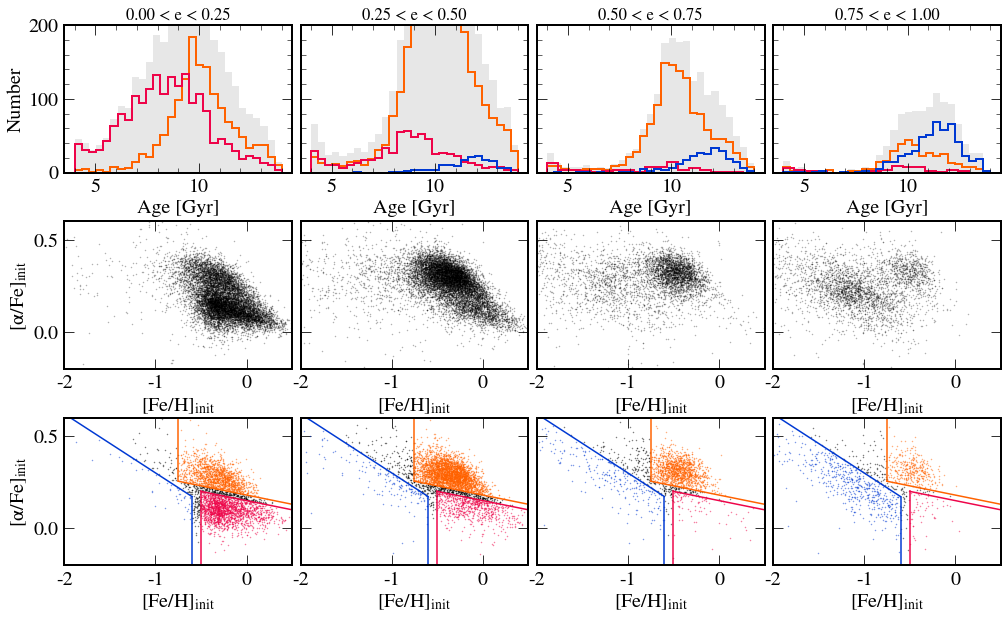

In [117]:
ecc_ranges = np.array([0,0.25,0.5,0.75,1])
# ecc_ranges = np.array([0,0.2,0.4,1])
Ne = np.size(ecc_ranges) - 1
wabins = np.linspace(4,14,20)

da = 3
fig, ax = plt.subplots(3,Ne,figsize=(1.2*Ne*da,3*da), sharey='row')

for i in range(Ne):
    ind = (t['eccen_pot1']>=ecc_ranges[i]) & (t['eccen_pot1']<ecc_ranges[i+1])
    
    plt.sca(ax[0][i])
    plt.hist(age[ind_safeage & ind], bins=abins, color='0.1', histtype='stepfilled', alpha=0.1, lw=2, density=False)
    plt.hist(age[ind_safeage & ind & ind_tdchem], bins=abins, color=orange, histtype='step', lw=2, density=False)
    if np.sum(ind_safeage & ind & ind_thin)>100:
        plt.hist(age[ind_safeage & ind & ind_thin], bins=abins, color=pink, histtype='step', lw=2, density=False)
    else:
        plt.hist(age[ind_safeage & ind & ind_thin], bins=wabins, color=pink, histtype='step', lw=2, density=False)
    if np.sum(ind_safeage & ind & ind_mpoor)>50:
        plt.hist(age[ind_safeage & ind & ind_mpoor], bins=abins, color=blue, histtype='step', lw=2, density=False)
    
    plt.ylim(0,200)
#     plt.gca().set_yscale('log')
    plt.title('{:.2f} < e < {:.2f}'.format(ecc_ranges[i], ecc_ranges[i+1]), fontsize='small')
    plt.xlabel('Age [Gyr]')
    plt.minorticks_on()
    
    plt.sca(ax[1][i])
    plt.plot(t['init_FeH'][ind], t['init_aFe'][ind], 'ko', mew=0, ms=1.5, alpha=0.3)
    
    plt.xlim(-2,0.5)
    plt.ylim(-0.2,0.6)
    plt.xlabel('[Fe/H]$_{init}$')
    
    plt.sca(ax[2][i])
    plt.plot(t['init_FeH'][ind_safeage & ind & ~ind_mpoor & ~ind_thin & ~ind_tdchem],
             t['init_aFe'][ind_safeage & ind & ~ind_mpoor & ~ind_thin & ~ind_tdchem],
             'ko', mew=0, ms=1.5, alpha=0.5)
    plt.plot(t['init_FeH'][ind_safeage & ind_mpoor & ind], t['init_aFe'][ind_safeage & ind_mpoor & ind], 'o',
             color=blue, mew=0, ms=1.5, alpha=0.5)
    plt.plot(t['init_FeH'][ind_safeage & ind_tdchem & ind], t['init_aFe'][ind_safeage & ind_tdchem & ind], 'o',
             color=orange, mew=0, ms=1.5, alpha=0.5)
    plt.plot(t['init_FeH'][ind_safeage & ind_thin & ind], t['init_aFe'][ind_safeage & ind_thin & ind], 'o',
             color=pink, mew=0, ms=1.5, alpha=0.5)
    plt.plot(x_ge, y_ge, '-', color=blue, label='')
    plt.plot([-0.6, -0.6], [-0.2, poly_ge(-0.6)], '-', color=blue, label='')
    plt.plot(x_splash, y_splash, '-', color=orange, label='')
    plt.plot([-0.75, -0.75], [poly_splash(-0.75), 0.6], '-', color=orange, label='')
    plt.plot(x_lowa, y_lowa, '-', color=pink, label='')
    plt.plot([-0.5, -0.5], [-0.2, poly_lowa(-0.5)], '-', color=pink, label='')
    
    plt.xlim(-2,0.5)
    plt.ylim(-0.2,0.6)
    plt.xlabel('[Fe/H]$_{init}$')
    
plt.sca(ax[0][0])
plt.ylabel('Number')

plt.sca(ax[1][0])
plt.ylabel('[$\\alpha$/Fe]$_{init}$')

plt.sca(ax[2][0])
plt.ylabel('[$\\alpha$/Fe]$_{init}$')
# plt.text(0.52,0.85,'3.8 < log g < 4.3', fontsize='x-small', transform=plt.gca().transAxes)
    
plt.tight_layout(h_pad=0.1, w_pad=0)
plt.savefig('../plots/age_byeccentricity_total.png')

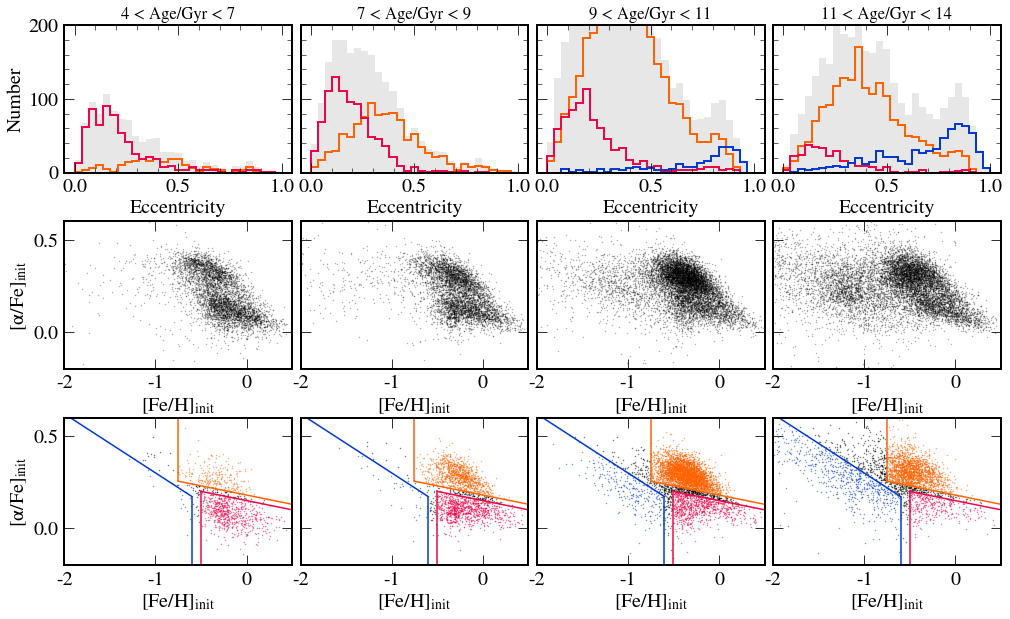

In [113]:
age_ranges = np.array([4,7,9,11,14])
Na = np.size(age_ranges) - 1
ebins = np.linspace(0,1,30)

da = 3
fig, ax = plt.subplots(3,Na,figsize=(1.2*Na*da,3*da), sharey='row')

for i in range(Na):
    ind = (age>=age_ranges[i]) & (age<age_ranges[i+1])
    
    plt.sca(ax[0][i])
    plt.hist(t['eccen_pot1'][ind_safeage & ind], bins=ebins, color='0.1', histtype='stepfilled',
             alpha=0.1, lw=2, density=False)
    plt.hist(t['eccen_pot1'][ind_safeage & ind & ind_tdchem], bins=ebins, color=orange, histtype='step',
             lw=2, density=False)
    plt.hist(t['eccen_pot1'][ind_safeage & ind & ind_thin], bins=ebins, color=pink, histtype='step',
             lw=2, density=False)
    if np.sum(ind_safeage & ind_mpoor & ind)>50:
        plt.hist(t['eccen_pot1'][ind_safeage & ind & ind_mpoor], bins=ebins, color=blue, histtype='step',
                 lw=2, density=False)
    
    plt.title('{:.0f} < Age/Gyr < {:.0f}'.format(age_ranges[i], age_ranges[i+1]), fontsize='small')
    plt.xlabel('Eccentricity')
    plt.ylim(0,200)
    plt.minorticks_on()
    
    plt.sca(ax[1][i])
    plt.plot(t['init_FeH'][ind], t['init_aFe'][ind], 'ko', mew=0, ms=1.5, alpha=0.3)
#     plt.plot(t['init_FeH'][ind_safeage & ind], t['init_aFe'][ind_safeage & ind], 'ko', mew=0, ms=1.5, alpha=0.3)
    
    plt.xlim(-2,0.5)
    plt.ylim(-0.2,0.6)
    plt.xlabel('[Fe/H]$_{init}$')
    
    plt.sca(ax[2][i])
    plt.plot(t['init_FeH'][ind_safeage & ind & ~ind_mpoor & ~ind_thin & ~ind_tdchem],
             t['init_aFe'][ind_safeage & ind & ~ind_mpoor & ~ind_thin & ~ind_tdchem],
             'ko', mew=0, ms=1.5, alpha=0.5)
    plt.plot(t['init_FeH'][ind_safeage & ind_mpoor & ind], t['init_aFe'][ind_safeage & ind_mpoor & ind], 'o',
             color=blue, mew=0, ms=1.5, alpha=0.5)
    plt.plot(t['init_FeH'][ind_safeage & ind_tdchem & ind], t['init_aFe'][ind_safeage & ind_tdchem & ind], 'o',
             color=orange, mew=0, ms=1.5, alpha=0.5)
    plt.plot(t['init_FeH'][ind_safeage & ind_thin & ind], t['init_aFe'][ind_safeage & ind_thin & ind], 'o',
             color=pink, mew=0, ms=1.5, alpha=0.5)
    
    plt.plot(x_ge, y_ge, '-', color=blue, label='')
    plt.plot([-0.6, -0.6], [-0.2, poly_ge(-0.6)], '-', color=blue, label='')
    plt.plot(x_splash, y_splash, '-', color=orange, label='')
    plt.plot([-0.75, -0.75], [poly_splash(-0.75), 0.6], '-', color=orange, label='')
    plt.plot(x_lowa, y_lowa, '-', color=pink, label='')
    plt.plot([-0.5, -0.5], [-0.2, poly_lowa(-0.5)], '-', color=pink, label='')
    
    plt.xlim(-2,0.5)
    plt.ylim(-0.2,0.6)
    plt.xlabel('[Fe/H]$_{init}$')
    
plt.sca(ax[0][0])
plt.ylabel('Number')

plt.sca(ax[1][0])
plt.ylabel('[$\\alpha$/Fe]$_{init}$')

plt.sca(ax[2][0])
plt.ylabel('[$\\alpha$/Fe]$_{init}$')
# plt.text(0.52,0.85,'3.8 < log g < 4.3', fontsize='x-small', transform=plt.gca().transAxes)
    
plt.tight_layout(h_pad=0.1, w_pad=0)
plt.savefig('../plots/eccentricity_byage_total.png')

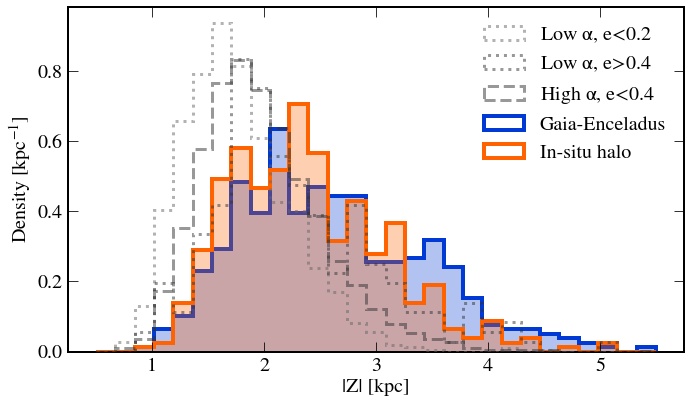

In [38]:
zbins = np.linspace(0.5,5.5,30)
ind_thick = ind_tdchem & (t['eccen_pot1']>0.) & (t['eccen_pot1']<0.4)
ind_thin = (t['init_FeH']>-0.5) & (t['init_aFe']<poly_splash(t['init_FeH']))

plt.figure(figsize=(10,6))

plt.hist(np.abs(t['Z_gal'][ind_safeage & ind_thin_c]), color='0.4', bins=zbins, alpha=0.5, density=True,
         label='Low $\\alpha$, e<0.2', histtype='step', ls=':', lw=3, zorder=10)
plt.hist(np.abs(t['Z_gal'][ind_safeage & ind_thin_e]), color='0.2', bins=zbins, alpha=0.5, density=True,
         label='Low $\\alpha$, e>0.4', histtype='step', ls=':', lw=3, zorder=10)
plt.hist(np.abs(t['Z_gal'][ind_safeage & ind_thick]), color='0.2', bins=zbins, alpha=0.5, density=True,
         label='High $\\alpha$, e<0.4', histtype='step', ls='--', lw=3, zorder=10)

plt.hist(np.abs(t['Z_gal'][ind_safeage & ind_ge]), color=blue, bins=zbins, alpha=0.3, density=True, label='')
plt.hist(np.abs(t['Z_gal'][ind_safeage & ind_ge]), color=blue, bins=zbins, density=True, histtype='step', lw=4,
         label='Gaia-Enceladus')
plt.hist(np.abs(t['Z_gal'][ind_safeage & ind_splash]), color=orange, bins=zbins, alpha=0.3, density=True, label='')
plt.hist(np.abs(t['Z_gal'][ind_safeage & ind_splash]), color=orange, bins=zbins, density=True, histtype='step', lw=4,
         label='In-situ halo')

plt.legend(loc=1, frameon=False)
plt.xlabel('|Z| [kpc]')
plt.ylabel('Density [kpc$^{-1}$]')

plt.tight_layout()
plt.savefig('../plots/ge_splash_zdist.png')

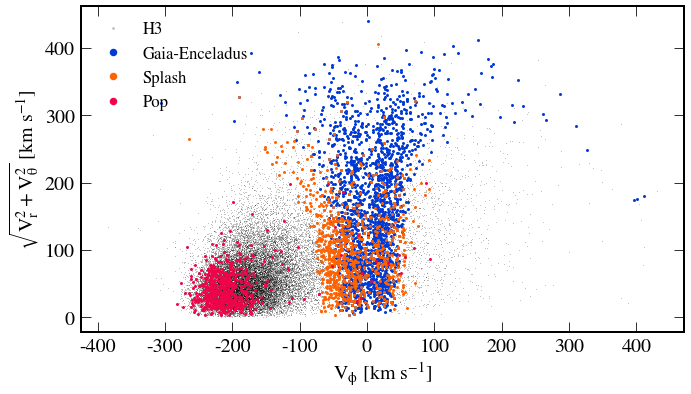

In [184]:
plt.figure(figsize=(10,6))

plt.plot(vy, vxz, 'ko', mew=0, ms=1, alpha=0.3, label='H3')
plt.plot(vy[ind_ge], vxz[ind_ge], 'o', color=blue, mew=0, ms=3, alpha=1, label='Gaia-Enceladus')
plt.plot(vy[ind_splash], vxz[ind_splash], 'o', color=orange, mew=0, ms=3, alpha=1, label='Splash')
plt.plot(vy[ind_rect], vxz[ind_rect], 'o', color=pink, mew=0, ms=3, alpha=1, label='Pop')

plt.legend(loc=2, markerscale=2.5, frameon=False, fontsize='small')
plt.xlabel('$V_\phi$ [km s$^{-1}$]')
plt.ylabel('$\sqrt{V_r^2 + V_\\theta^2}$ [km s$^{-1}$]')
plt.gca().set_aspect('equal')

plt.tight_layout()
plt.savefig('../plots/toomre_selection.png')

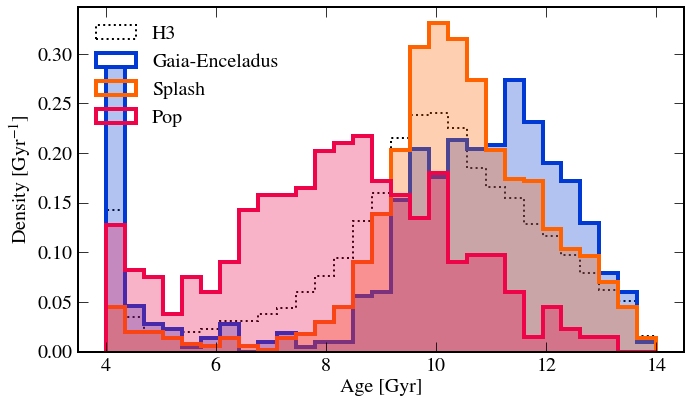

In [144]:
abins = np.linspace(4,14,30)

plt.figure(figsize=(10,6))

plt.hist(age[ind_safeage], color='k', bins=abins, alpha=1, density=True, label='H3', histtype='step', ls=':', lw=2)

plt.hist(age[ind_safeage & ind_ge], color=blue, bins=abins, alpha=0.3, density=True, label='')
plt.hist(age[ind_safeage & ind_ge], color=blue, bins=abins, density=True, histtype='step', lw=4,
         label='Gaia-Enceladus')
plt.hist(age[ind_safeage & ind_splash], color=orange, bins=abins, alpha=0.3, density=True, label='')
plt.hist(age[ind_safeage & ind_splash], color=orange, bins=abins, density=True, histtype='step', lw=4,
         label='Splash')
plt.hist(age[ind_safeage & ind_rect], color=pink, bins=abins, alpha=0.3, density=True, label='')
plt.hist(age[ind_safeage & ind_rect], color=pink, bins=abins, density=True, histtype='step', lw=4,
         label='Pop')

plt.legend(loc=2, frameon=False)
plt.xlabel('Age [Gyr]')
plt.ylabel('Density [Gyr$^{-1}$]')

plt.tight_layout()
plt.savefig('../plots/ge_splash_pop_ages.png')

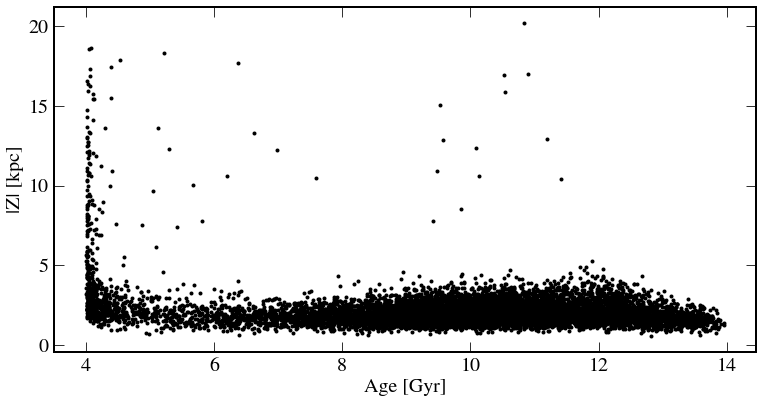

In [145]:
plt.figure(figsize=(11,6))
plt.plot(age[ind_safeage], np.abs(t['Z_gal'][ind_safeage]), 'ko', mew=0, ms=4)
# plt.plot(age[ind_safeage & ind_splash], np.abs(t['Z_gal'][ind_safeage & ind_splash]), 'o', color=orange, mew=0, ms=4)

plt.xlabel('Age [Gyr]')
plt.ylabel('|Z| [kpc]')
plt.tight_layout()